In [2]:
%matplotlib inline

import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import norm 
import scipy as sc
import re
import scipy.optimize

from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=1.2)

In [7]:
dir = './'
    
print  (os.listdir( dir  ))
print(len(os.listdir(dir)))

In [39]:
a_main = pd.DataFrame()

filelist = os.listdir(dir)
for f in filelist:
    root, ext = os.path.splitext(f)
    if ext != '.csv':
        continue;
    
    print(f)
    
    main = pd.read_csv(f, delimiter=',', header=0, index_col =False)
    a_main = pd.concat([a_main, main], ignore_index=True)
            

Sub1-male-age40-ver1.0-2019-11-24-14-18-19.csv


In [40]:
print(a_main.columns)

Index(['SubId', 'ExpType', 'trialId', 'condition', 'response'], dtype='object')


In [41]:
g_main = pd.DataFrame({'response' : a_main.groupby(['SubId', 'ExpType', 'condition'])['response'].mean()}).reset_index()


In [42]:
def transconum(label):
    if (label == 1):
        return 'Control'
    else:
        return 'Target'
    
g_main['Condition'] = g_main['condition'].apply(transconum)


# Plot all data

C:\Anaconda\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


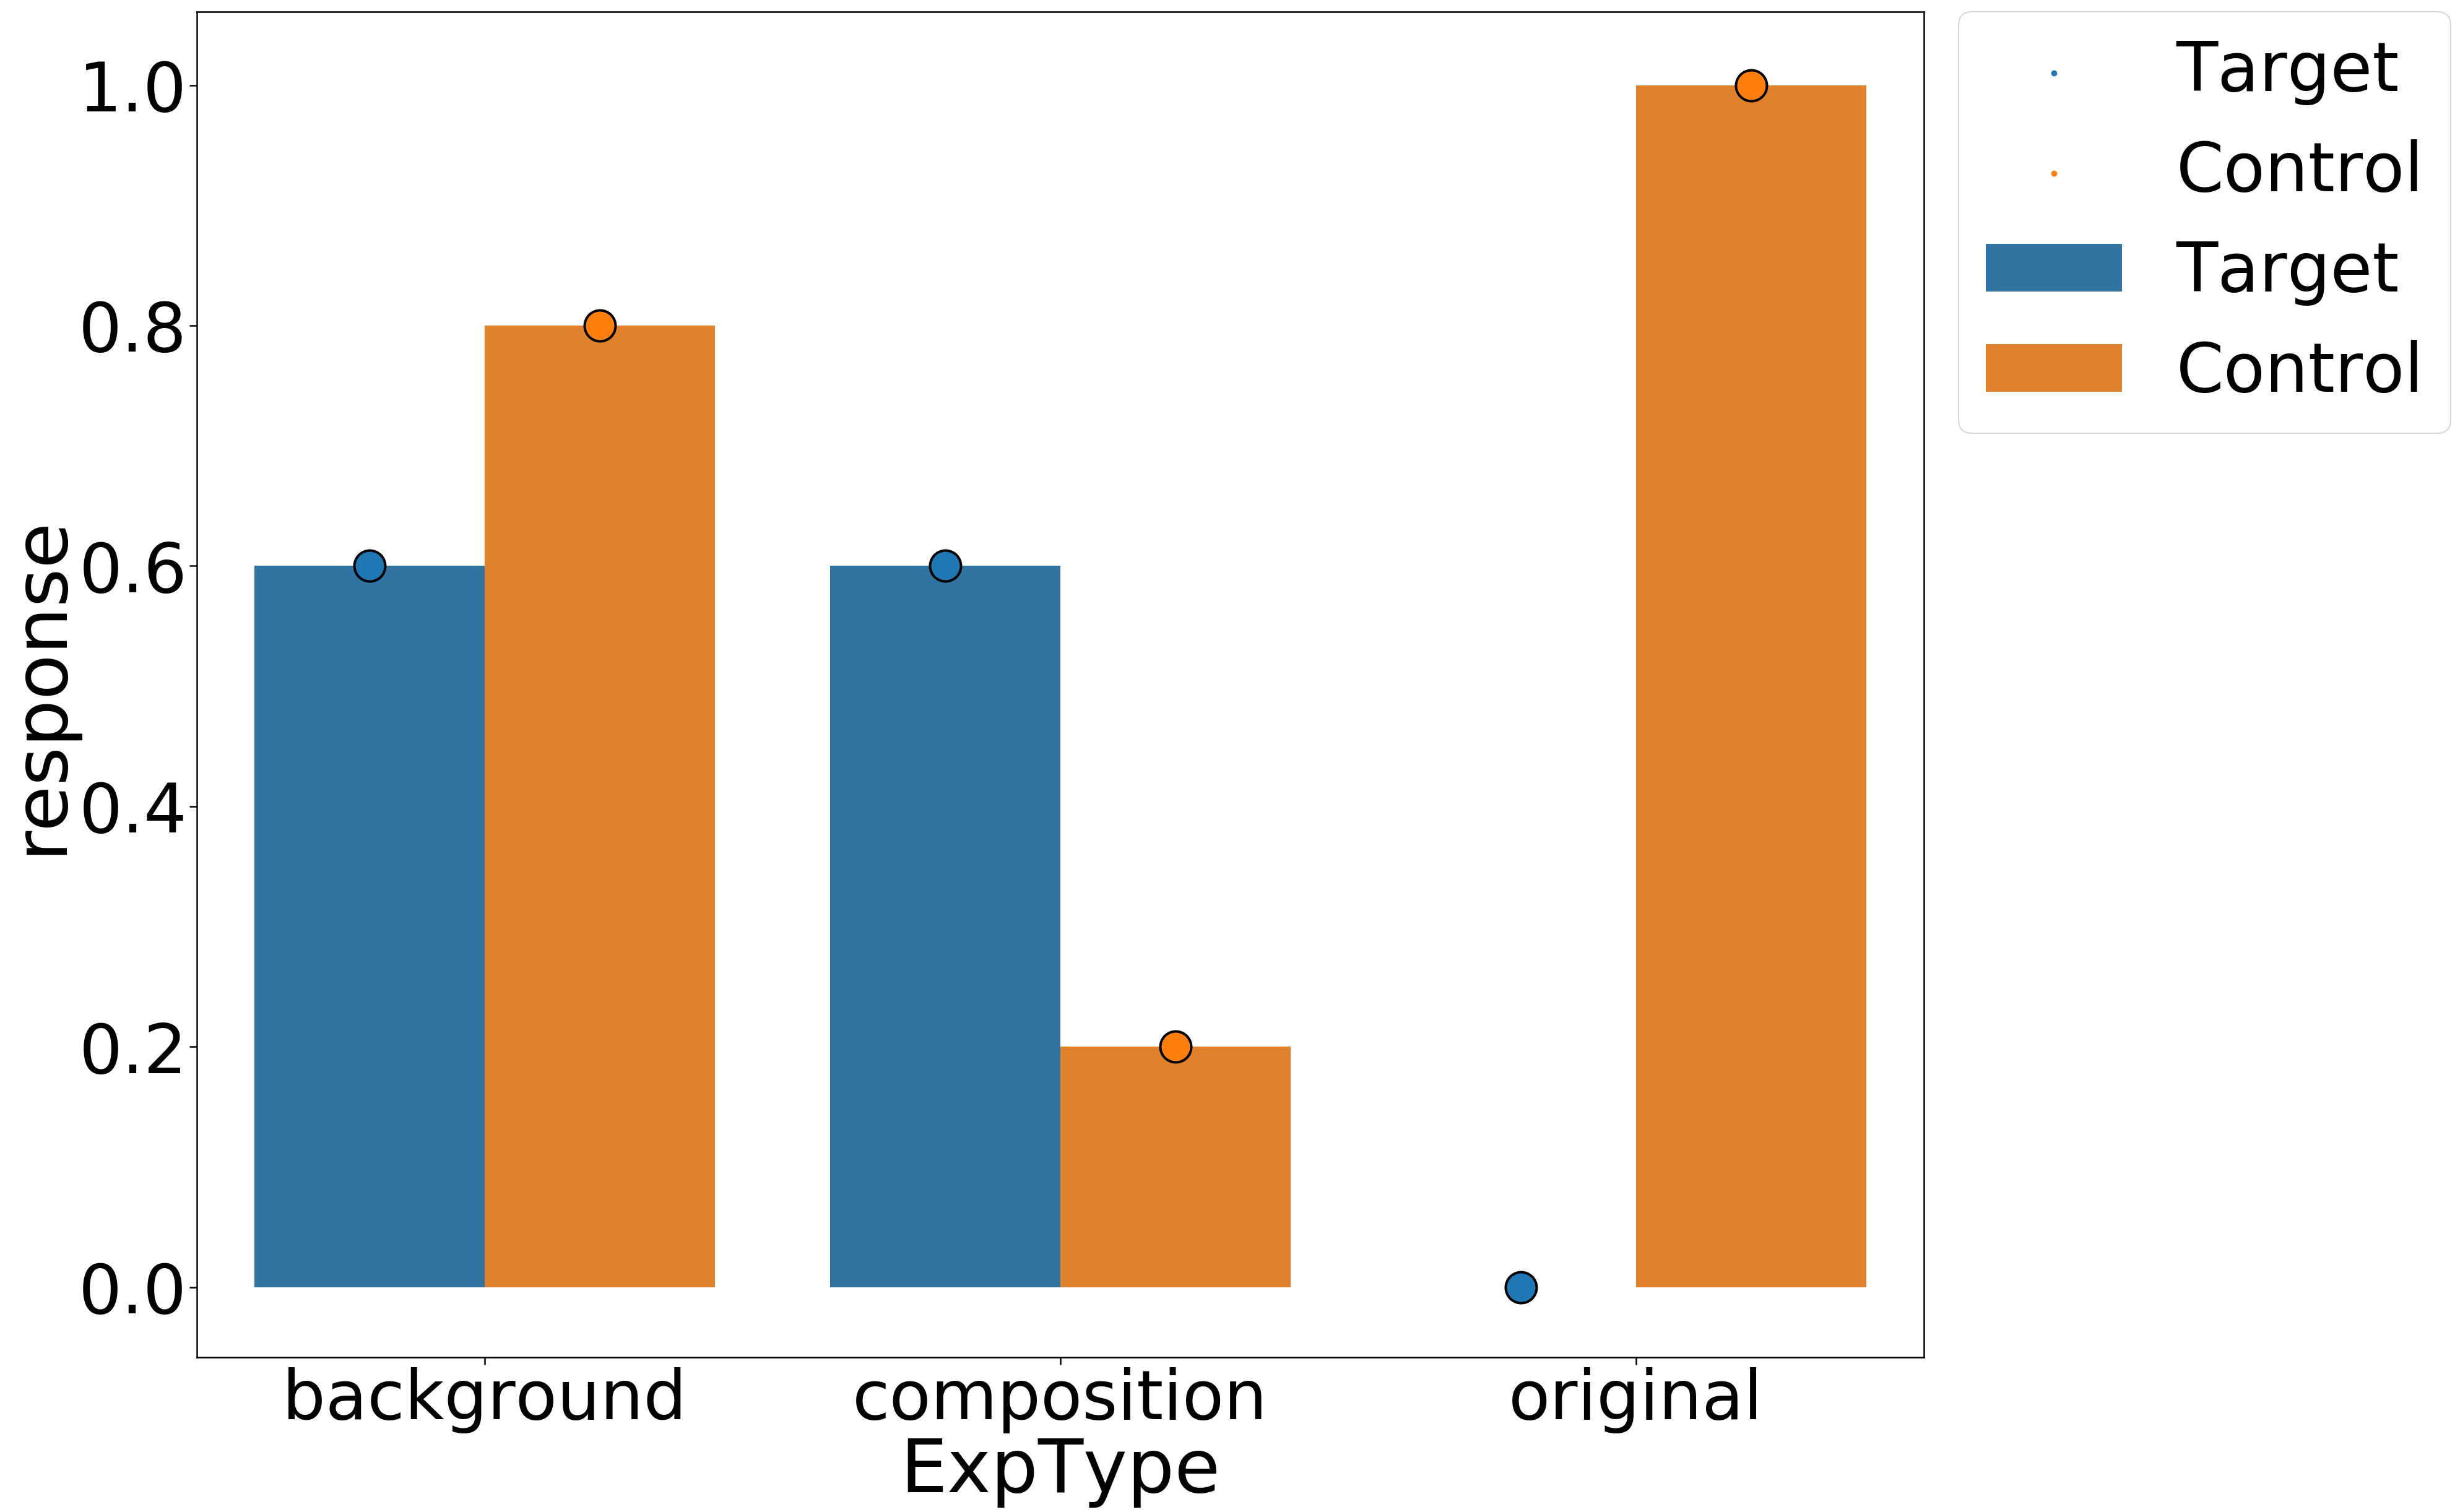

In [44]:
sns.set_context("poster", font_scale=5)
plt.subplots(figsize=(50, 40))

g = sns.swarmplot(x="ExpType", y="response", data=g_main, hue='Condition', split=True, size=50.0, edgecolor='black', linewidth=4);
g = sns.barplot(x='ExpType', y='response', data=g_main, hue='Condition' , ci=68)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

